## Import libraries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Assigning the data - X and y

In [2]:
m = 100
X_poly = 6 * np.random.rand(m, 1) - 3
y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.randn(m, 1)

In [3]:
def add_polynomial_features(X, degree=2):
    """
    Add polynomial features up to the given degree.
    """
    X_poly = X
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X**d]
    return X_poly

## Initializing the Error/Cost/Loss Function

In [4]:
def compute_cost(X, y, theta):
    """
    Compute the cost function (Mean Squared Error)
    """
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

## Apply Gradient Descent

In [5]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    """
    Implement gradient descent to minimize the cost function
    """
    m = len(y)
    cost_history = np.zeros(num_iterations)

    for i in range(num_iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

## Assigning the polynomial features and beta parameters

In [6]:
X_poly_features = add_polynomial_features(X_poly, degree=2)
X_poly_b = np.c_[np.ones((m, 1)), X_poly_features]
beta_poly = np.random.randn(X_poly_b.shape[1], 1)
alpha_poly = 0.1
num_iterations_poly = 1000

In [7]:
beta_poly_optimal, cost_history_poly = gradient_descent(X_poly_b, y_poly, beta_poly, alpha_poly, num_iterations_poly)
beta_poly_optimal, cost_history_poly[-1]


(array([[2.19159122],
        [0.96521201],
        [0.4059973 ]]),
 0.5259011431242727)

## Plotting the data, and the shape of the data

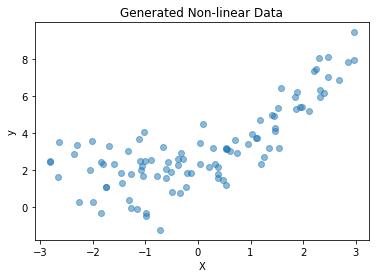

In [8]:
plt.scatter(X_poly, y_poly, alpha = 0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Non-linear Data')
plt.show()

## Apply the polynomial regression and plotting the regression polynomial on datapoints

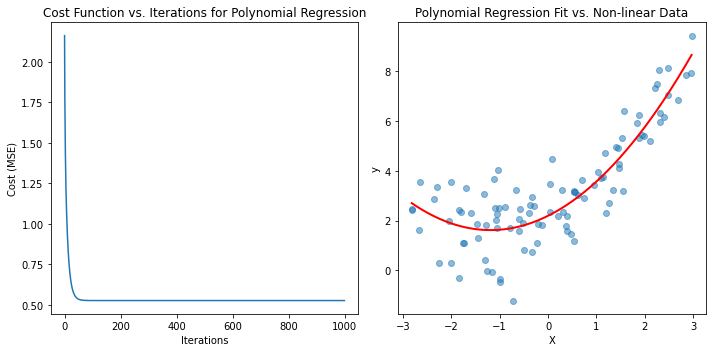

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cost_history_poly)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function vs. Iterations for Polynomial Regression')

plt.subplot(1, 2, 2)
plt.scatter(X_poly, y_poly, alpha=0.5)

X_plot = np.linspace(X_poly.min(), X_poly.max(), 400).reshape(-1, 1)

X_plot_poly = add_polynomial_features(X_plot, degree=2)
X_plot_poly_b = np.c_[np.ones((X_plot_poly.shape[0], 1)), X_plot_poly]
y_plot = X_plot_poly_b.dot(beta_poly_optimal)
plt.plot(X_plot, y_plot, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit vs. Non-linear Data')

plt.tight_layout()
plt.show()